# Presentation of the Data 

The data that we are going to use is coming from [study of UCI](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) on [payment defaults](https://fr.wikipedia.org/wiki/D%C3%A9faut_de_paiement) at Taiwan

## Uploading the data

Download the file that contains the data to study from the internet



In [2]:
!wget http://perso-etis.ensea.fr/picard/UCI_Credit_Card.csv

--2019-11-24 00:09:14--  http://perso-etis.ensea.fr/picard/UCI_Credit_Card.csv
Resolving perso-etis.ensea.fr (perso-etis.ensea.fr)... 193.51.45.246
Connecting to perso-etis.ensea.fr (perso-etis.ensea.fr)|193.51.45.246|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://perso-etis.ensea.fr//picard/UCI_Credit_Card.csv [following]
--2019-11-24 00:09:15--  https://perso-etis.ensea.fr//picard/UCI_Credit_Card.csv
Connecting to perso-etis.ensea.fr (perso-etis.ensea.fr)|193.51.45.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2862995 (2.7M) [text/csv]
Saving to: ‘UCI_Credit_Card.csv.3’

UCI_Credit_Card.csv 100%[===================>]   2.73M  3.76MB/s    in 0.7s    

2019-11-24 00:09:16 (3.76 MB/s) - ‘UCI_Credit_Card.csv.3’ saved [2862995/2862995]



## Data Exploration

The downloaded file is of type [csv](https://fr.wikipedia.org/wiki/Comma-separated_values)

We will display the first 5 lines of the file to find out:
- If the first row contains the names of the columns or not
- The separator used (comma, semicolon, tabulation ..)

In [3]:
file_name = "UCI_Credit_Card.csv"

with open(file_name, encoding="utf-8") as f:
  file_content = f.read()

file_lines = file_content.split("\n")

for i in range(5):
  print(file_lines[i])

"ID","LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","default.payment.next.month"
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


We note that the first row contains the names of the columns and that the separator used is the comma. We can now use pandas to load the file into a dataframe

In [4]:
import pandas as pd

uci = pd.read_csv(file_name, sep=",", header=0)
"""
The previous line is equivalent to:
uci = pd.read_csv(file_name)
since the default separator is the comma 
and the first row of the file is considered 
by default to contain the names of the columns.
The official doc of read_csv: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
"""

# We display the first 5 rows of the dataframe
uci.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data formatting

## Examples of data selection




Some examples of data selection from the dataframe to simplify the understanding of what follows

In [5]:
print(f"Type of uci: {type(uci)}")
print(f"Size of uci: {uci.shape}")
print("\n") # insertion of an empty line

print("Selecting the first row of the dataframe")
print(uci.values[0, :])
print("\n")

print("Selection of the first row of the dataframe but only the values of the columns from 'EDUCATION' to 'Age' included")
print(uci.values[0, 3:6]) # with the syntax a: b column a is included in the selection but not b
print("\n")

print("Selection of the first line of the dataframe but only the values of the columns from 'EDUCATION' to 'PAY_AMT2' included")
print(uci.values[0, 3:-5]) # Negative indices can be used: -1 being the index of the last column

Type of uci: <class 'pandas.core.frame.DataFrame'>
Size of uci: (30000, 25)


Selecting the first row of the dataframe
[ 1.000e+00  2.000e+04  2.000e+00  2.000e+00  1.000e+00  2.400e+01
  2.000e+00  2.000e+00 -1.000e+00 -1.000e+00 -2.000e+00 -2.000e+00
  3.913e+03  3.102e+03  6.890e+02  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  6.890e+02  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  1.000e+00]


Selection of the first row of the dataframe but only the values of the columns from 'EDUCATION' to 'Age' included
[ 2.  1. 24.]


Selection of the first line of the dataframe but only the values of the columns from 'EDUCATION' to 'PAY_AMT2' included
[ 2.000e+00  1.000e+00  2.400e+01  2.000e+00  2.000e+00 -1.000e+00
 -1.000e+00 -2.000e+00 -2.000e+00  3.913e+03  3.102e+03  6.890e+02
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  6.890e+02]


## Data Selection

X: Matrix of features

Y: Vector labels

In [6]:
"""
X: all rows of the dataframe, the columns from 'Limit_BAL' to 'PAY_AMT6'
Y: all rows of the dataframe, last column only
"""
X = uci.values[:, 1:-1]
Y = uci.values[:,-1]

print(f"Type of X: {type(X)}")
print(f"Size of X: {X.shape}\n")

print(f"Type of Y: {type(Y)}")
print(f"Size of Y: {Y.shape}")

Type of X: <class 'numpy.ndarray'>
Size of X: (30000, 23)

Type of Y: <class 'numpy.ndarray'>
Size of Y: (30000,)


## Methodology

The available data should be divided into three parts:
- One part for training models
- One part for the validation of the training
- One part for the performance test of the model

The rows allocated to each of the three parts will be chosen randomly

In [7]:
import numpy as np

size = len(Y)
perm = np.arange(size)
print(f"Before the shuffle: {perm}")
np.random.shuffle(perm)
print(f"After the shuffle: {perm}")

Before the shuffle: [    0     1     2 ... 29997 29998 29999]
After the shuffle: [9724 9633 2208 ... 2781 1926 7489]


In [0]:
import math

training_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

last_training_index = math.floor(size * training_ratio)
last_validation_index = last_training_index + math.floor(size * validation_ratio)

In [9]:
X_train = X[perm[0:last_training_index], :]
Y_train = Y[perm[0:last_training_index]]

X_val = X[perm[last_training_index:last_validation_index],:]
Y_val = Y[perm[last_training_index:last_validation_index]]

X_test = X[perm[last_validation_index:], :]
Y_test = Y[perm[last_validation_index:]]

print(f"{X_train.shape} training samples, {X_val.shape} validation samples, {X_test.shape} test samples")

(21000, 23) training samples, (4500, 23) validation samples, (4500, 23) test samples


## Data Display in 2D

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

cmap = ListedColormap(["#0000FF", "#FF0000"])

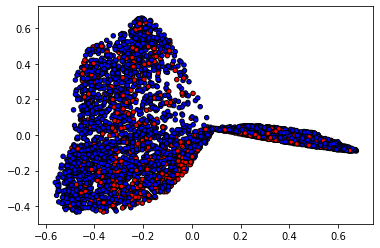

In [11]:
minmax = MinMaxScaler(feature_range=(-1,1))
X = minmax.fit_transform(X_val)

proj = KernelPCA(n_components=2, kernel="rbf", gamma=1.0)
X_pca = proj.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y_val, cmap=cmap, edgecolors="k", s=20)

# Classification

In [12]:
k=len(Y_test)
Y_class=np.zeros(k,)
Y_class=np.random.randint(2,size=(k,))
print(Y_class)

[1 1 1 ... 1 0 0]


In [13]:
S=0
for i in range(k):
  if(Y_class[i]==Y_test[i]):
    S+=1
accuracy=S/k
print(accuracy)

0.5108888888888888


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_class, normalize=True)  #On a trouvé une fonction qui s'occupe de calculer la précision

0.5108888888888888

On utilise maintenant un classifieur dans la bibilothèque sklearn où on peut choisir la distribution.

In [15]:
from sklearn.dummy import DummyClassifier
Uniform=DummyClassifier(strategy='uniform', random_state=None, constant=None)
Uniform.fit(X_train, Y_train)
Y_Uniform=Uniform.predict(X_test)
accuracy_Uniform=accuracy_score(Y_test,Y_Uniform, normalize=True)
print('Accuracy:',accuracy_Uniform)

Accuracy: 0.5088888888888888


Pour un classificateur aléatoire on a une précision de 50% (on a utilisé une distribution uniforme pour les labels). 
Les modèles que l'on va construire doivent au minimum avoir une meilleure précision.


In [16]:
Stratified=DummyClassifier(strategy='stratified', random_state=None, constant=None)
Stratified.fit(X_train, Y_train)
Y_Stratified=Stratified.predict(X_test)
accuracy_Stratified=accuracy_score(Y_test,Y_Stratified, normalize=True)
print('Accuracy:',accuracy_Stratified)

Accuracy: 0.6553333333333333


On a utilisé un classificateur aléatoire qui n'a pas une distribution uniforme, celui ci introduit du biais. 

## k-nearest neighbors

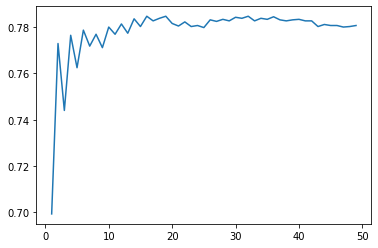

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
K=range(1,50)
accuracy_KNN=[]
for k in K:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train, Y_train)   #On entraîne le KNN modèle avec les échantillons d'entraînement (X_train,Y_train)
  Y_KNN = KNN.predict(X_test) # #Le modèle prédit des labels pour les X_test
  accuracy_knn=accuracy_score(Y_test,Y_KNN, normalize=True)  #On compare les prédiction avec les 'true' labels pour déterminer la précision
  accuracy_KNN.append(accuracy_knn)   
plt.plot(K,accuracy_KNN)

Le but de ce classificateur est de déterminer la classe d'un point grâce à ses points voisins. Pour k=3, si deux de ses voisins sont bleus, ce point va être bleu.
On remarque que plus k est grand, plus la précision va converger vers la probabilité de points majoritaires.
Lorsque k est trop petit (ici K<=10),la précision est très instable.
Une bonne valeur de K ici est 42.
Le classificateur KNN est simple mais la classification n'est pas optimale.

## Decision trees

On construit de manière similaire notre modèle 'Decision tree'.
On prend différentes valeurs de max_depth (nombre de questions posées dans l'arbre, ie le nombre de niveaux dans l'arbre) pour voir l'influence de ce paramètre sur la précision.


In [18]:
from sklearn import tree
arbre = tree.DecisionTreeClassifier(max_depth=1)  
arbre.fit(X_train, Y_train)
Y_arbre_train=arbre.predict(X_train)
Y_arbre_val=arbre.predict(X_val)
Y_arbre_test=arbre.predict(X_test)
accuracy_tree_train=accuracy_score(Y_train,Y_arbre_train,normalize=True)
accuracy_tree_val=accuracy_score(Y_val, Y_arbre_val, normalize=True)
accuracy_tree_test = accuracy_score(Y_test,Y_arbre_test, normalize=True) 
print('Accuracy_train:',accuracy_tree_train)
print('Accuracy_val:',accuracy_tree_val)
print('Accuracy_test:',accuracy_tree_test)

Accuracy_train: 0.820047619047619
Accuracy_val: 0.8115555555555556
Accuracy_test: 0.8255555555555556


In [19]:
arbre = tree.DecisionTreeClassifier(max_depth=23)  # max_depth = nombre de questions posées dans l'arbre. 
arbre.fit(X_train, Y_train)
Y_arbre_train=arbre.predict(X_train)
Y_arbre_val=arbre.predict(X_val)
Y_arbre_test=arbre.predict(X_test)
accuracy_tree_train=accuracy_score(Y_train,Y_arbre_train,normalize=True)
accuracy_tree_val=accuracy_score(Y_val, Y_arbre_val, normalize=True)
accuracy_tree_test = accuracy_score(Y_test,Y_arbre_test, normalize=True) 
print('Accuracy_train:',accuracy_tree_train)
print('Accuracy_val:',accuracy_tree_val)
print('Accuracy_test:',accuracy_tree_test)

Accuracy_train: 0.9733333333333334
Accuracy_val: 0.7411111111111112
Accuracy_test: 0.7415555555555555


In [20]:
arbre = tree.DecisionTreeClassifier(max_depth=5)  # max_depth = nombre de questions posées dans l'arbre, ie le nombre de niveaux dans l'arbre. 
arbre.fit(X_train, Y_train)
Y_arbre_train=arbre.predict(X_train)
Y_arbre_val=arbre.predict(X_val)
Y_arbre_test=arbre.predict(X_test)
accuracy_tree_train=accuracy_score(Y_train,Y_arbre_train,normalize=True)
accuracy_tree_val=accuracy_score(Y_val, Y_arbre_val, normalize=True)
accuracy_tree_test = accuracy_score(Y_test,Y_arbre_test, normalize=True) 
print('Accuracy_train:',accuracy_tree_train)
print('Accuracy_val:',accuracy_tree_val)
print('Accuracy_test:',accuracy_tree_test)

Accuracy_train: 0.8244761904761905
Accuracy_val: 0.8137777777777778
Accuracy_test: 0.8288888888888889


[Text(172.2825, 199.32, 'X[5] <= 1.5\ngini = 0.345\nsamples = 21000\nvalue = [16340, 4660]'),
 Text(89.28, 163.07999999999998, 'X[6] <= 1.5\ngini = 0.276\nsamples = 18775\nvalue = [15668, 3107]'),
 Text(44.64, 126.83999999999999, 'X[19] <= 582.5\ngini = 0.246\nsamples = 17210\nvalue = [14744, 2466]'),
 Text(22.32, 90.6, 'X[11] <= 533.5\ngini = 0.343\nsamples = 4530\nvalue = [3533, 997]'),
 Text(11.16, 54.359999999999985, 'X[22] <= 884.5\ngini = 0.398\nsamples = 1844\nvalue = [1338, 506]'),
 Text(5.58, 18.119999999999976, 'gini = 0.417\nsamples = 1512\nvalue = [1064, 448]'),
 Text(16.740000000000002, 18.119999999999976, 'gini = 0.288\nsamples = 332\nvalue = [274, 58]'),
 Text(33.480000000000004, 54.359999999999985, 'X[8] <= 1.0\ngini = 0.299\nsamples = 2686\nvalue = [2195, 491]'),
 Text(27.9, 18.119999999999976, 'gini = 0.27\nsamples = 2166\nvalue = [1818, 348]'),
 Text(39.06, 18.119999999999976, 'gini = 0.399\nsamples = 520\nvalue = [377, 143]'),
 Text(66.96000000000001, 90.6, 'X[8] <=

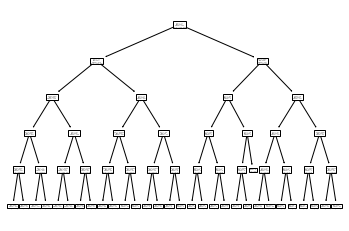

In [21]:
tree.plot_tree(arbre.fit(X_train, Y_train)) #On affiche l'arbre


Si max_depth est trop élevé (max_depth=23): overfitting (excellente présion d'entraînement mais mauvaise précision au niveau la validation, et donc au niveau du test),ce qui est logique car trop de questions donc mauvaise généralisation. </br>
Si max_depth est trop faible (max_depth=1): on devrait avoir de l'underfitting (pas assez de questions donc pas assez d'information), ce qui n'est pas trop le cas ici (la précision d'entraînement reste correcte). </br>
Un bon max_depth pour eviter l'overfitting et l'underfitting est 5. <br>
Ce modèle est meilleur que le KNN, ce qui est logique vu que la classification se fait en prenant en compte plus de paramètre que le KNN (dans celui ci on prend en compte que les classes des voisins).


## SVM

In [22]:
from sklearn.svm import SVC
SVM = SVC(C=1,gamma='auto')
SVM.fit(X_train, Y_train) 
Y_SVM_train=SVM.predict(X_train)
Y_SVM_val=SVM.predict(X_val)
Y_SVM_test=SVM.predict(X_test)
accuracy_SVM_train = accuracy_score(Y_train,Y_SVM_train, normalize=True)
accuracy_SVM_val=accuracy_score(Y_val, Y_SVM_val, normalize=True)
accuracy_SVM_test = accuracy_score(Y_test,Y_SVM_test, normalize=True) 
print('Accuracy train:',accuracy_SVM_train)
print('Accuracy val:',accuracy_SVM_val)
print('Accuracy test:',accuracy_SVM_test)

Accuracy train: 0.9931904761904762
Accuracy val: 0.7788888888888889
Accuracy test: 0.7853333333333333


In [23]:
SVM = SVC(C=1,gamma='scale')
SVM.fit(X_train, Y_train) 
Y_SVM_train=SVM.predict(X_train)
Y_SVM_val=SVM.predict(X_val)
Y_SVM_test=SVM.predict(X_test)
accuracy_SVM_train = accuracy_score(Y_train,Y_SVM_train, normalize=True)
accuracy_SVM_val=accuracy_score(Y_val, Y_SVM_val, normalize=True)
accuracy_SVM_test = accuracy_score(Y_test,Y_SVM_test, normalize=True) 
print('Accuracy train:',accuracy_SVM_train)
print('Accuracy val:',accuracy_SVM_val)
print('Accuracy test:',accuracy_SVM_test)

Accuracy train: 0.7781904761904762
Accuracy val: 0.7775555555555556
Accuracy test: 0.7833333333333333


In [24]:
SVM = SVC(C=1,gamma='scale',kernel='poly', max_iter=1000000)
SVM.fit(X_train, Y_train) 
Y_SVM_train=SVM.predict(X_train)
Y_SVM_val=SVM.predict(X_val)
Y_SVM_test=SVM.predict(X_test)
accuracy_SVM_train = accuracy_score(Y_train,Y_SVM_train, normalize=True)
accuracy_SVM_val=accuracy_score(Y_val, Y_SVM_val, normalize=True)
accuracy_SVM_test = accuracy_score(Y_test,Y_SVM_test, normalize=True) 
print('Accuracy train:',accuracy_SVM_train)
print('Accuracy val:',accuracy_SVM_val)
print('Accuracy test:',accuracy_SVM_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Accuracy train: 0.7785238095238095
Accuracy val: 0.7773333333333333
Accuracy test: 0.7831111111111111


On choisissant un gamma à auto, on a un overfitting.
En changeant avec un gamma en scale avec un kernel différent on se retrouve avec un résultat plus convenable mais on se rapproche de l'underfitting. 

## Logistic Regression


In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=10000)
LR.fit(X_train,Y_train)
Y_LR_train=LR.predict(X_train)
Y_LR_val=LR.predict(X_val)
Y_LR_test=LR.predict(X_test)
accuracy_LR_train = accuracy_score(Y_train,Y_LR_train, normalize=True) 
accuracy_LR_val = accuracy_score(Y_val,Y_LR_val, normalize=True) 
accuracy_LR_test = accuracy_score(Y_test,Y_LR_test, normalize=True) 
print('Accuracy train:',accuracy_LR_train)
print('Accuracy val:',accuracy_LR_val)
print('Accuracy test:',accuracy_LR_test)

Accuracy train: 0.7780476190476191
Accuracy val: 0.7775555555555556
Accuracy test: 0.7831111111111111


In [30]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial',max_iter=10000)
LR.fit(X_train,Y_train)
Y_LR_train=LR.predict(X_train)
Y_LR_val=LR.predict(X_val)
Y_LR_test=LR.predict(X_test)
accuracy_LR_train = accuracy_score(Y_train,Y_LR_train, normalize=True) 
accuracy_LR_val = accuracy_score(Y_val,Y_LR_val, normalize=True) 
accuracy_LR_test = accuracy_score(Y_test,Y_LR_test, normalize=True) 
print('Accuracy train:',accuracy_LR_train)
print('Accuracy val:',accuracy_LR_val)
print('Accuracy test:',accuracy_LR_test)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy train: 0.811047619047619
Accuracy val: 0.8088888888888889
Accuracy test: 0.8166666666666667


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [0]:
LR = LogisticRegression(random_state=0, solver='saga',multi_class='multinomial',max_iter=10000)
LR.fit(X_train,Y_train)
Y_LR_train=LR.predict(X_train)
Y_LR_val=LR.predict(X_val)
Y_LR_test=LR.predict(X_test)
accuracy_LR_train = accuracy_score(Y_train,Y_LR_train, normalize=True) 
accuracy_LR_val = accuracy_score(Y_val,Y_LR_val, normalize=True) 
accuracy_LR_test = accuracy_score(Y_test,Y_LR_test, normalize=True) 
print('Accuracy train:',accuracy_LR_train)
print('Accuracy val:',accuracy_LR_val)
print('Accuracy test:',accuracy_LR_test)

Accuracy train: 0.7780952380952381
Accuracy val: 0.7775555555555556
Accuracy test: 0.7831111111111111


On choisissant des solver différents, on remarque que le newton est celui qui donne le résultat les plus convenables. En effet, les deux autres pourraient s'apparenter à de l'underfitting car la précision d'entraînement est en dessous de 80%.

## Neural networks

MLP

In [38]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD

batch_size = 128
epochs = 20

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(23,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                240       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_10 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
Train on 21000 samples, validate on 4500 samples
Epoch 1/20
21000/21000 [==============================] - 1s 71us/step - 

In [40]:
batch_size = 128
epochs = 20

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(23,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                240       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_14 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)               

Avec les réseaux de neurones, on choisit quelle fonction d'optimisation on veut. On trouve à peu près les mêmes résultats concernant la précision des tests.